In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import boxcox

In [2]:
#Loaded Libraries

In [3]:
ASI_Base = pd.read_csv('C:/Users/matth/Desktop/Week-4-Analysis/ASI_Base.csv')

In [4]:
#Loaded Data

In [5]:
ASI_Base.head()

,Unnamed: 0,Year,Age,Gender,C1,C2,C3,C4,CTotal,DHEA,IF,INF,P17-OH,TotalIgA,GIgA,RandID
0,0,10,42,F,19.0,6,4.0,5.0,34,1.0,3.0,3.0,49.0,5.0,23.0,9383480749
1,1,11,60,F,12.0,7,4.0,7.0,30,2.0,3.0,22.0,15.0,7.0,5.0,2705809722
2,2,14,49,F,11.0,1,1.0,1.0,14,3.0,3.0,3.0,30.0,5.0,1.0,517281238
3,3,14,35,F,12.0,3,6.0,1.0,22,6.0,15.0,18.0,33.0,16.0,4.0,2356075951
4,4,13,53,F,20.0,7,4.0,3.0,34,5.0,3.0,7.0,9.0,5.0,13.0,9137475714


In [6]:
ASI_Base1 = ASI_Base[['Age','DHEA']]

In [7]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     255 non-null    int64  
 1   DHEA    250 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [8]:
#DROP NA Values

In [12]:
ASI_Base1.dropna(inplace=True)

<ipython-input-12-a356c9faf015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1.dropna(inplace=True)


In [13]:
#Convert DHEA into Integer

In [14]:
ASI_Base1['DHEA'] = ASI_Base1['DHEA'].astype(int)

<ipython-input-14-2a892db57b1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['DHEA'] = ASI_Base1['DHEA'].astype(int)


In [15]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     250 non-null    int64
 1   DHEA    250 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 4.9 KB


In [16]:
ASI_Base1['DHEALOG'] = np.log(ASI_Base1['DHEA'])

<ipython-input-16-bb71ae7ed462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['DHEALOG'] = np.log(ASI_Base1['DHEA'])


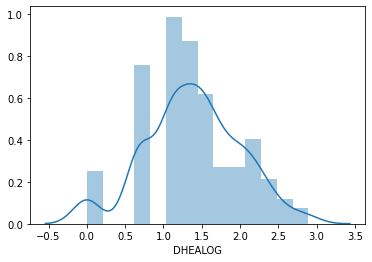

In [18]:
sns.distplot(ASI_Base1['DHEALOG'])

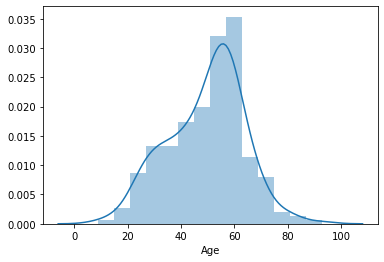

In [19]:
sns.distplot(ASI_Base1['Age'])

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ASI_Base1)

     Age  DHEA   DHEALOG
0     42     1  0.000000
1     60     2  0.693147
2     49     3  1.098612
3     35     6  1.791759
4     53     5  1.609438
5     53     2  0.693147
6     55     4  1.386294
7     56     4  1.386294
8     24     3  1.098612
9     55     7  1.945910
10    93     3  1.098612
11    55     2  0.693147
12    46     3  1.098612
13    57     5  1.609438
14    46     2  0.693147
15    50     2  0.693147
16    68     4  1.386294
17    28     3  1.098612
18    56     2  0.693147
19    28    18  2.890372
20    35     3  1.098612
21    49     4  1.386294
22    39     3  1.098612
23    60    14  2.639057
24    27     3  1.098612
25    59     5  1.609438
26    43     7  1.945910
27    54     3  1.098612
28    28     8  2.079442
29    33    10  2.302585
30    57     5  1.609438
31    41    11  2.397895
32    57     4  1.386294
33    79     1  0.000000
34    31     3  1.098612
35    46     7  1.945910
36    53     1  0.000000
37    60     2  0.693147
38    69     4  1.386294


In [21]:
#It seems that when the DHEA WAS A 1, the LOG will be a 0.000000...

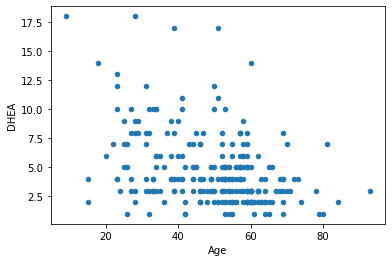

In [23]:
Plot = ASI_Base1.plot.scatter( x = 'Age', y = 'DHEA')

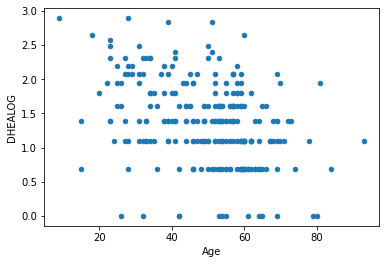

In [24]:
Plot = ASI_Base1.plot.scatter( x = 'Age', y = 'DHEALOG')

In [25]:
x = ASI_Base1['Age']
y = ASI_Base1['DHEALOG']

In [26]:
model = sm.OLS(y,x).fit()

In [28]:
pred_val = model.fittedvalues.copy()
true_val = ASI_Base1['DHEALOG'].values.copy()
residual = true_val - pred_val

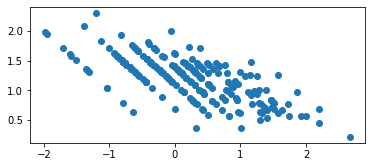

In [29]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [30]:
# This is kind of going at a slope

In [31]:
sms.diagnostic.het_breuschpagan(residual, ASI_Base1[['Age']])

(55.516384018725134, nan, 71.07837619593373, 2.7970737005817873e-15)

In [32]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=4.124073723037562, pvalue=5.094556664967306e-05)

In [33]:
# This seems to fail both tests

In [34]:
transformed, _ = boxcox(ASI_Base1['Age'])

(array([ 4., 25., 29., 38., 60., 62., 22.,  5.,  4.,  1.]),
 array([ 11.14887791,  30.64266038,  50.13644284,  69.6302253 ,
         89.12400776, 108.61779022, 128.11157268, 147.60535514,
        167.0991376 , 186.59292006, 206.08670252]),
 <a list of 10 Patch objects>)

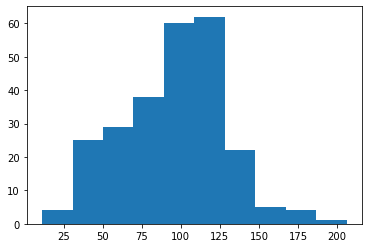

In [35]:
plt.hist(transformed)

In [36]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                DHEALOG   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.664
Method:                 Least Squares   F-statistic:                              495.2
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                    3.94e-61
Time:                        22:14:43   Log-Likelihood:                         -321.44
No. Observations:                 250   AIC:                                      644.9
Df Residuals:                     249   BIC:                                      648.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0122      0.001     22.252      0.000       0.011       0.013
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.448
Skew:                           0.103   Prob(JB):                        0.799
Kurtosis:                       2.986   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
pred_val1 = model1.fittedvalues.copy()
true_val = ASI_Base1['DHEA'].values.copy()
residual1 = true_val - pred_val

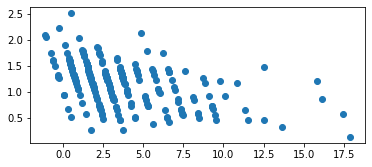

In [43]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val1)

In [44]:
sms.diagnostic.het_breuschpagan(residual1, ASI_Base1[['Age']])

(31.64061943698823, nan, 36.0804936316284, 6.674167515679752e-09)

In [45]:
sms.linear_harvey_collier(model1)

Ttest_1sampResult(statistic=4.866097849150678, pvalue=2.0347296951051863e-06)

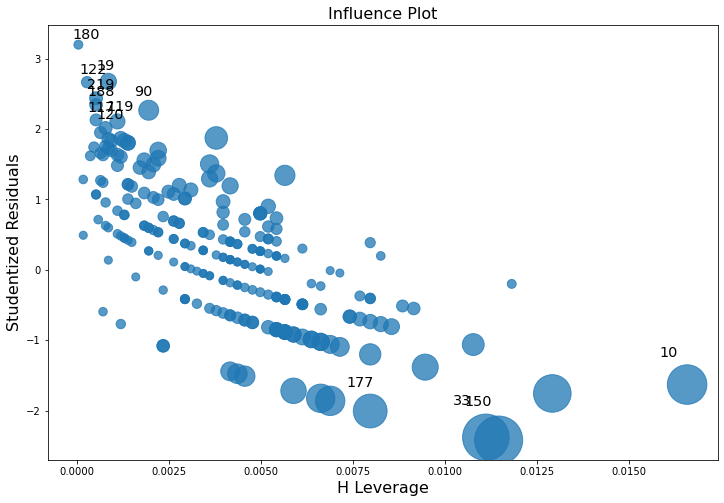

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, alpha = .05, ax = ax, criterion="cooks")

In [47]:
# I am not sure with this graph if this is right or wrong?

In [48]:
infl = model1.get_influence()
print(infl.summary_frame())

       dfb_x1       cooks_d  standard_resid  hat_diag  dffits_internal  \
0   -0.052423  2.746356e-03       -1.079882  0.002350        -0.052406   
1   -0.066723  4.455810e-03       -0.885298  0.005653        -0.066752   
2   -0.003031  9.223104e-06       -0.051727  0.003435        -0.003037   
3    0.045838  2.097724e-03        1.182583  0.001498         0.045801   
4    0.025792  6.674869e-04        0.399395  0.004167         0.025836   
5   -0.041836  1.754333e-03       -0.647496  0.004167        -0.041885   
6    0.005229  2.745096e-05        0.077373  0.004564         0.005239   
7    0.003014  9.123085e-06        0.043623  0.004771         0.003020   
8    0.017279  2.991626e-04        0.713584  0.000587         0.017296   
9    0.048496  2.356519e-03        0.716879  0.004564         0.048544   
10  -0.211650  4.449922e-02       -1.625208  0.016568        -0.210948   
11  -0.048351  2.342394e-03       -0.714728  0.004564        -0.048398   
12   0.002496  6.254175e-06        0.0